### References
[Notes on EOF Analysis](https://websites.pmc.ucsc.edu/~dmk/notes/EOFs/EOFs.html)

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

from eofs.standard import Eof
from eofs.examples import example_data_path

### [North Atlantic Oscillation](https://ajdawson.github.io/eofs/latest/examples/nao_standard.html)
Compute and plot the leading EOF of geopotential height on the 500 hPa
pressure surface over the European/Atlantic sector during winter time.

This example uses the plain numpy interface.

Additional requirements for this example:

* [netCDF4](http://unidata.github.io/netcdf4-python/)
* [matplotlib](http://matplotlib.org/)
* [cartopy](http://scitools.org.uk/cartopy/)

Dimensión: 65 fechas, 1 alturas, 29 latitudes, 49 longitudes


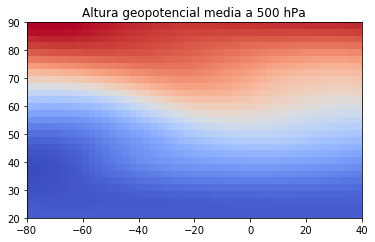

In [15]:
# Read geopotential height data using the netCDF4 module. The file contains
# December-February averages of geopotential height at 500 hPa for the
# European/Atlantic domain (80W-40E, 20-90N).
filename = example_data_path('hgt_djf.nc')
ncin = Dataset(filename, 'r')
z_djf = ncin.variables['z'][:]
lons = ncin.variables['longitude'][:]
lats = ncin.variables['latitude'][:]
ncin.close()

print('Dimensión: {0} fechas, {1} alturas, {2} latitudes, {3} longitudes'.format(*z_djf.shape))
plt.imshow(z_djf.mean(axis=(0, 1)), cmap='coolwarm',
           extent=[lons[0], lons[-1], lats[0], lats[-1]])
plt.title('Altura geopotencial media a 500 hPa');

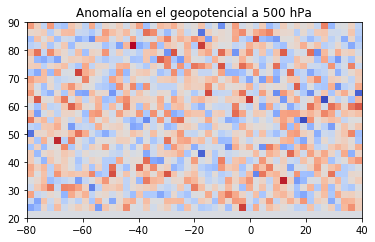

In [16]:
# Compute anomalies by removing the time-mean.
z_djf_mean = z_djf.mean(axis=0)
z_djf = z_djf - z_djf_mean

plt.imshow(z_djf.mean(axis=(0, 1)), cmap='coolwarm',
           extent=[lons[0], lons[-1], lats[0], lats[-1]])
plt.title('Anomalía en el geopotencial a 500 hPa');

In [17]:
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(lats)).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(z_djf, weights=wgts)

In [18]:
# Retrieve the leading EOF, expressed as the covariance between the leading PC
# time series and the input SLP anomalies at each grid point.
eof1 = solver.eofsAsCovariance(neofs=1)
eofs = solver.eofsAsCovariance(neofs=3)

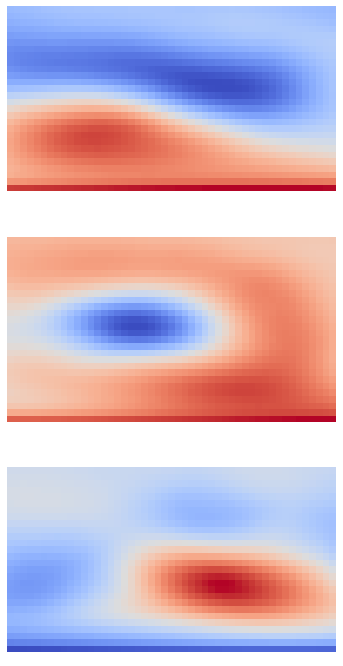

In [19]:
fig, ax = plt.subplots(nrows=3, figsize=(8, 12))

for i in range(eofs.shape[0]):
    ax[i].imshow(eofs[i,0,:,:], cmap='coolwarm',
                 extent=[lons[0], lons[-1], lats[0], lats[-1]])
    ax[i].axis('off')

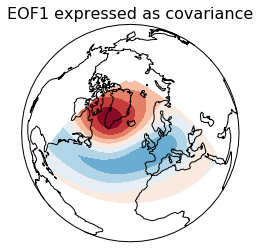

In [20]:
# Plot the leading EOF expressed as covariance in the European/Atlantic domain.
clevs = np.linspace(-75, 75, 11)
proj = ccrs.Orthographic(central_longitude=-20, central_latitude=60)
ax = plt.axes(projection=proj)
ax.set_global()
ax.coastlines()
ax.contourf(lons, lats, eof1.squeeze(), levels=clevs,
            cmap=plt.cm.RdBu_r, transform=ccrs.PlateCarree())
plt.title('EOF1 expressed as covariance', fontsize=16)

plt.show()

### [El Niño](https://ajdawson.github.io/eofs/latest/examples/elnino_standard.html)
Compute and plot the leading EOF of sea surface temperature in the
central and northern Pacific during winter time.

The spatial pattern of this EOF is the canonical El Nino pattern, and
the associated time series shows large peaks and troughs for well-known
El Nino and La Nina events.

This example uses the plain numpy interface.

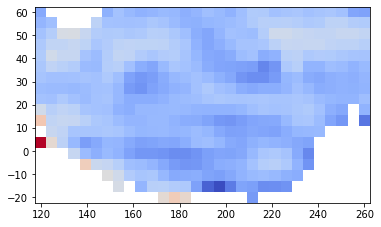

In [28]:
# Read SST anomalies using the netCDF4 module. The file contains
# November-March averages of SST anomaly in the central and northern Pacific.
filename = example_data_path('sst_ndjfm_anom.nc')
ncin = Dataset(filename, 'r')
sst = ncin.variables['sst'][:]
lons = ncin.variables['longitude'][:]
lats = ncin.variables['latitude'][:]
ncin.close()

plt.imshow(sst.mean(axis=0), cmap='coolwarm',
           extent=[lons[0], lons[-1], lats[0], lats[-1]]);

In [29]:
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(lats))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)

In [21]:
wgts.shape

(29, 1)

In [30]:
# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)

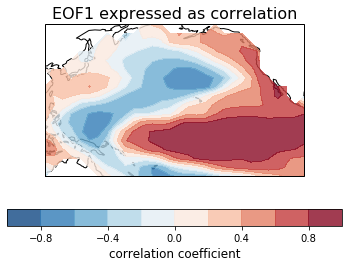

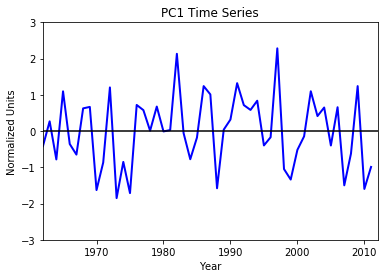

In [39]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = ax.contourf(lons, lats, eof1.squeeze(), clevs,
                   transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r, alpha=.8)
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
plt.title('EOF1 expressed as correlation', fontsize=16)

# Plot the leading PC time series.
plt.figure()
years = range(1962, 2012)
plt.plot(years, pc1, color='b', linewidth=2)
plt.axhline(0, color='k')
plt.title('PC1 Time Series')
plt.xlabel('Year')
plt.ylabel('Normalized Units')
plt.xlim(1962, 2012)
plt.ylim(-3, 3)

plt.show()